# Brownian Motion and Applications

A Geometric Brownian motion is a continuous-time stochastic process. More rigorously, Geometric Brownian motion process is specified through an stochastic differential equation (SDE) of the form

**dSₜ = μSₜdt + σSₜdWₜ**

*   Sₜ = the stock price
*   dSₜ = the change in stock price
*   μ = the expected return
*   σ = the standard deviation of returns
*   Wₜ = the Wiener Process random variable where increments in t time have a normal distribution N that is centered at zero (i.e Wₜ -W₀~ N(0,t) )
*   dₜ = the elapsed time period​

Some key assumptions include that the random variable is normally distributed so in this case, we use the logarithmic change of the stock price which is assumed as such. Volatility / standard deviation is constant. Expected return is independent of current price / performance.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

The above SDE has an analytic solution which is implemented below.

In [ ]:
def BrownianMotion(S, T, r, q, sigma, steps, N):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # [steps,N] Matrix of asset paths 
    """
    dt = T/steps
    #S_{T} = ln(S_{0})+\int_{0}^T(\mu-\frac{\sigma^2}{2})dt+\int_{0}^T \sigma dW(t)
    ST = np.log(S) +  np.cumsum(((r - q - sigma**2/2)*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=(steps,N))),axis=0)
    
    return np.exp(ST)

Text(0.5, 1.0, 'Geometric Brownian Motion')

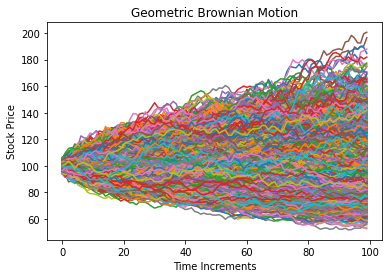

In [ ]:
S = 100 #stock price S_{0}
K = 110 # strike
T = 1/2 # time to maturity
r = 0.05 # risk free risk in annual %
q = 0.02 # annual dividend rate
sigma = 0.25 # annual volatility in %
steps = 100 # time steps
N = 10000 # number of trials

paths= brownian_motion(S,T,r, q,sigma,steps,N)

plt.plot(paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")

A multidimensional geometric Brownian motion can be specified through a system of SDEs, assuming you want to simulate a portfolio of d stocks.

In [ ]:
def MultivariateGBM(seed, S, mu, sigma, Cov, T, N):
    """
    Parameters
    seed:   seed of simulation
    So:     initial stocks' price
    mu:     expected return
    sigma:  volatility
    Cov:    covariance matrix
    T:      time period
    N:      number of increments
    """

    np.random.seed(seed)
    dim = np.size(S)
    t = np.linspace(0., T, int(N))
    A = np.linalg.cholesky(Cov)
    S = np.zeros([dim, int(N)])
    S[:, 0] = S
    for i in range(1, int(N)):    
        drift = (mu - 0.5 * sigma**2) * (t[i] - t[i-1])
        Z = np.random.normal(0., 1., dim)
        diffusion = np.matmul(A, Z) * (np.sqrt(t[i] - t[i-1]))
        S[:, i] = S[:, i-1]*np.exp(drift + diffusion)
    return S, t

In [ ]:
import pandas_datareader as pdr
from datetime import datetime

intc = pdr.get_data_yahoo(symbols='INTC', start=datetime(2018, 1, 1), end=datetime(2020, 1, 1))
amd = pdr.get_data_yahoo(symbols='AMD', start=datetime(2018, 1, 1), end=datetime(2020, 1, 1))

In [ ]:
#Visualize the closing price history
import matplotlib.pyplot as plt

plt.figure(figsize = (16,8))
plt.title('Close Price History', fontsize = 18)
plt.plot(intc['Adj Close'])
plt.plot(amd['Adj Close'])
plt.legend(['INTC', 'AMD'], loc = 'upper left', fontsize = 18)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

# Options Pricing with Monte Carlo Simulation

In [ ]:
payoffs = np.maximum(paths[-1]-K, 0)
option_price = np.mean(payoffs)*np.exp(-r*T) #discounting back to present value

In [ ]:
option_price

3.847482560249035

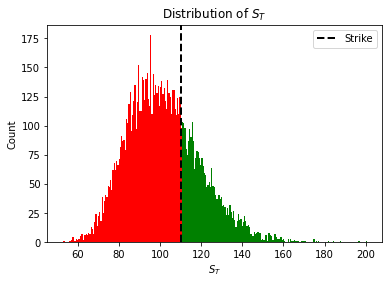

In [ ]:
n, bins, patches = plt.hist(paths[-1],bins=250);
for c, p in zip(bins, patches):
    if c > K:
        plt.setp(p, 'facecolor', 'green')
    else:
        plt.setp(p, 'facecolor', 'red')

plt.axvline(K, color='black', linestyle='dashed', linewidth=2,label="Strike")
plt.title("Distribution of $S_{T}$")
plt.xlabel("$S_{T}$")
plt.ylabel('Count')
plt.legend()

In [ ]:
max_=np.max(paths,axis=0)
payoffs = np.maximum(max_-K, 0)
lookback_price = np.mean(payoffs)*np.exp(-r*T)
print(f"lookback price is {lookback_price}")

lookback price is 7.061502844715245
